本demo利用乳腺癌数据集进行半监督式学习

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
breast_cancer_data =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None
                               ,names = ['C_D','C_T','U_C_Si','U_C_Sh','M_A','S_E_C_S'
                                        ,'B_N','B_C','N_N','M','Class'])

In [71]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
C_D        699 non-null int64
C_T        699 non-null int64
U_C_Si     699 non-null int64
U_C_Sh     699 non-null int64
M_A        699 non-null int64
S_E_C_S    699 non-null int64
B_N        699 non-null object
B_C        699 non-null int64
N_N        699 non-null int64
M          699 non-null int64
Class      699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [72]:
breast_cancer_data.head(5)

,C_D,C_T,U_C_Si,U_C_Sh,M_A,S_E_C_S,B_N,B_C,N_N,M,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [73]:
breast_cancer_data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [74]:
breast_cancer_data.applymap(int)

ValueError: ("invalid literal for int() with base 10: '?'", 'occurred at index B_N')

In [75]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
C_D        699 non-null int64
C_T        699 non-null int64
U_C_Si     699 non-null int64
U_C_Sh     699 non-null int64
M_A        699 non-null int64
S_E_C_S    699 non-null int64
B_N        699 non-null object
B_C        699 non-null int64
N_N        699 non-null int64
M          699 non-null int64
Class      699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [77]:
mean_value = breast_cancer_data[breast_cancer_data["B_N"] != "?"]["B_N"].astype(np.int).mean() # 计算异常值列的平均值
mean_value

3.5446559297218156

In [79]:
breast_cancer_data[breast_cancer_data["B_N"] != "?"]["B_N"].astype(np.int).mode()[0]

1

In [80]:
breast_cancer_data['B_N'].replace("?", 1, inplace=True)

In [87]:
breast_cancer_data['B_N'] = breast_cancer_data['B_N'].astype(int)

In [88]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
C_D        699 non-null int64
C_T        699 non-null int64
U_C_Si     699 non-null int64
U_C_Sh     699 non-null int64
M_A        699 non-null int64
S_E_C_S    699 non-null int64
B_N        699 non-null int64
B_C        699 non-null int64
N_N        699 non-null int64
M          699 non-null int64
Class      699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [89]:
breast_cancer_data.drop('C_D',axis=1, inplace=True)

In [90]:
breast_cancer_data.head()

,C_T,U_C_Si,U_C_Sh,M_A,S_E_C_S,B_N,B_C,N_N,M,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [91]:
breast_cancer_data.to_csv('breast-cancer-wisconsin_cleaned.csv')

### 一、数据探索

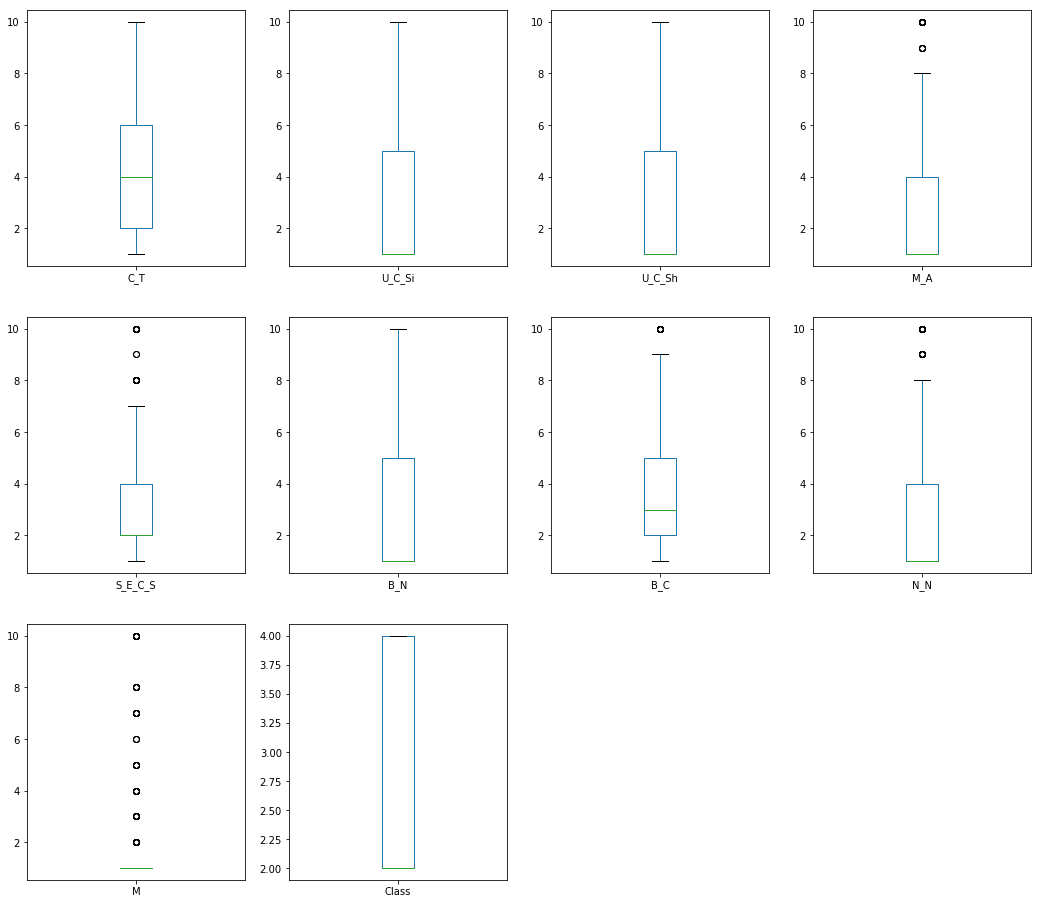

In [92]:
# 整体分布的箱型图
breast_cancer_data.plot(kind='box', figsize=(18, 16), subplots=True, layout=(3, 4), sharex=False, sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a245babe0>,
      dtype=object)

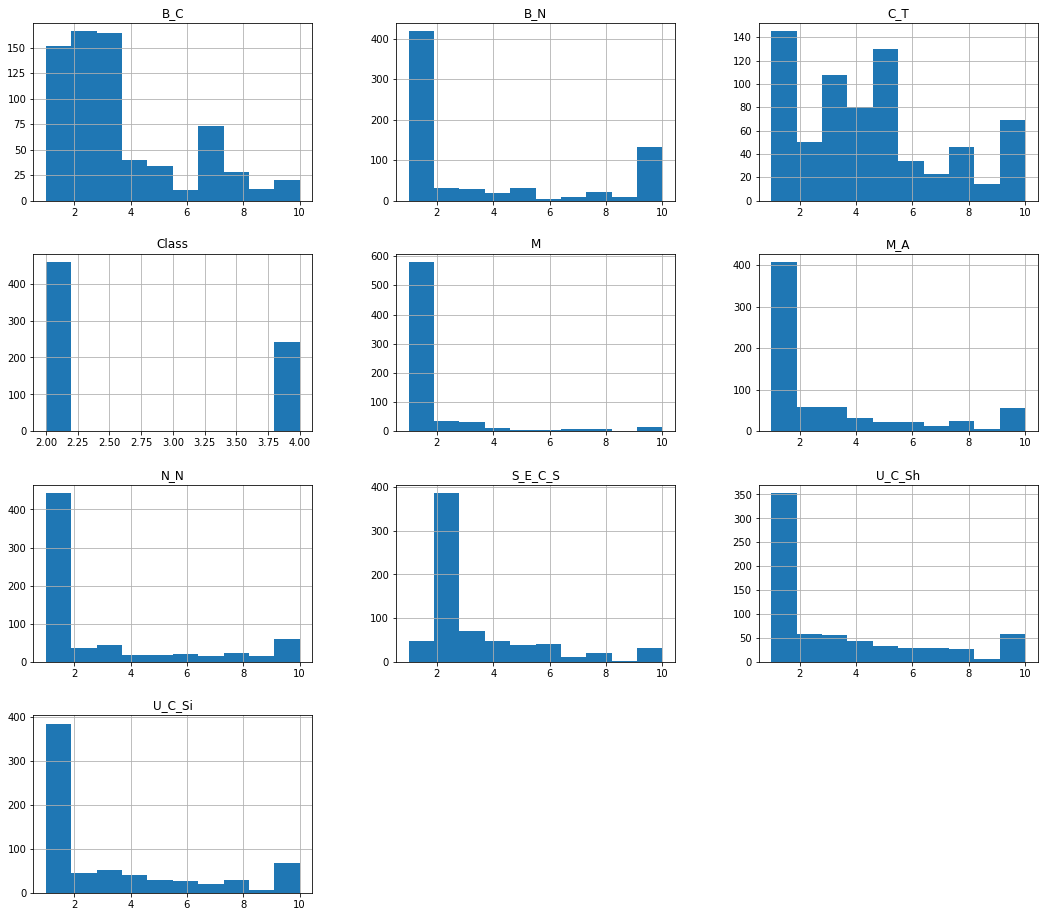

In [93]:
# 整体分布的直方图
breast_cancer_data.hist(figsize=(18, 16))

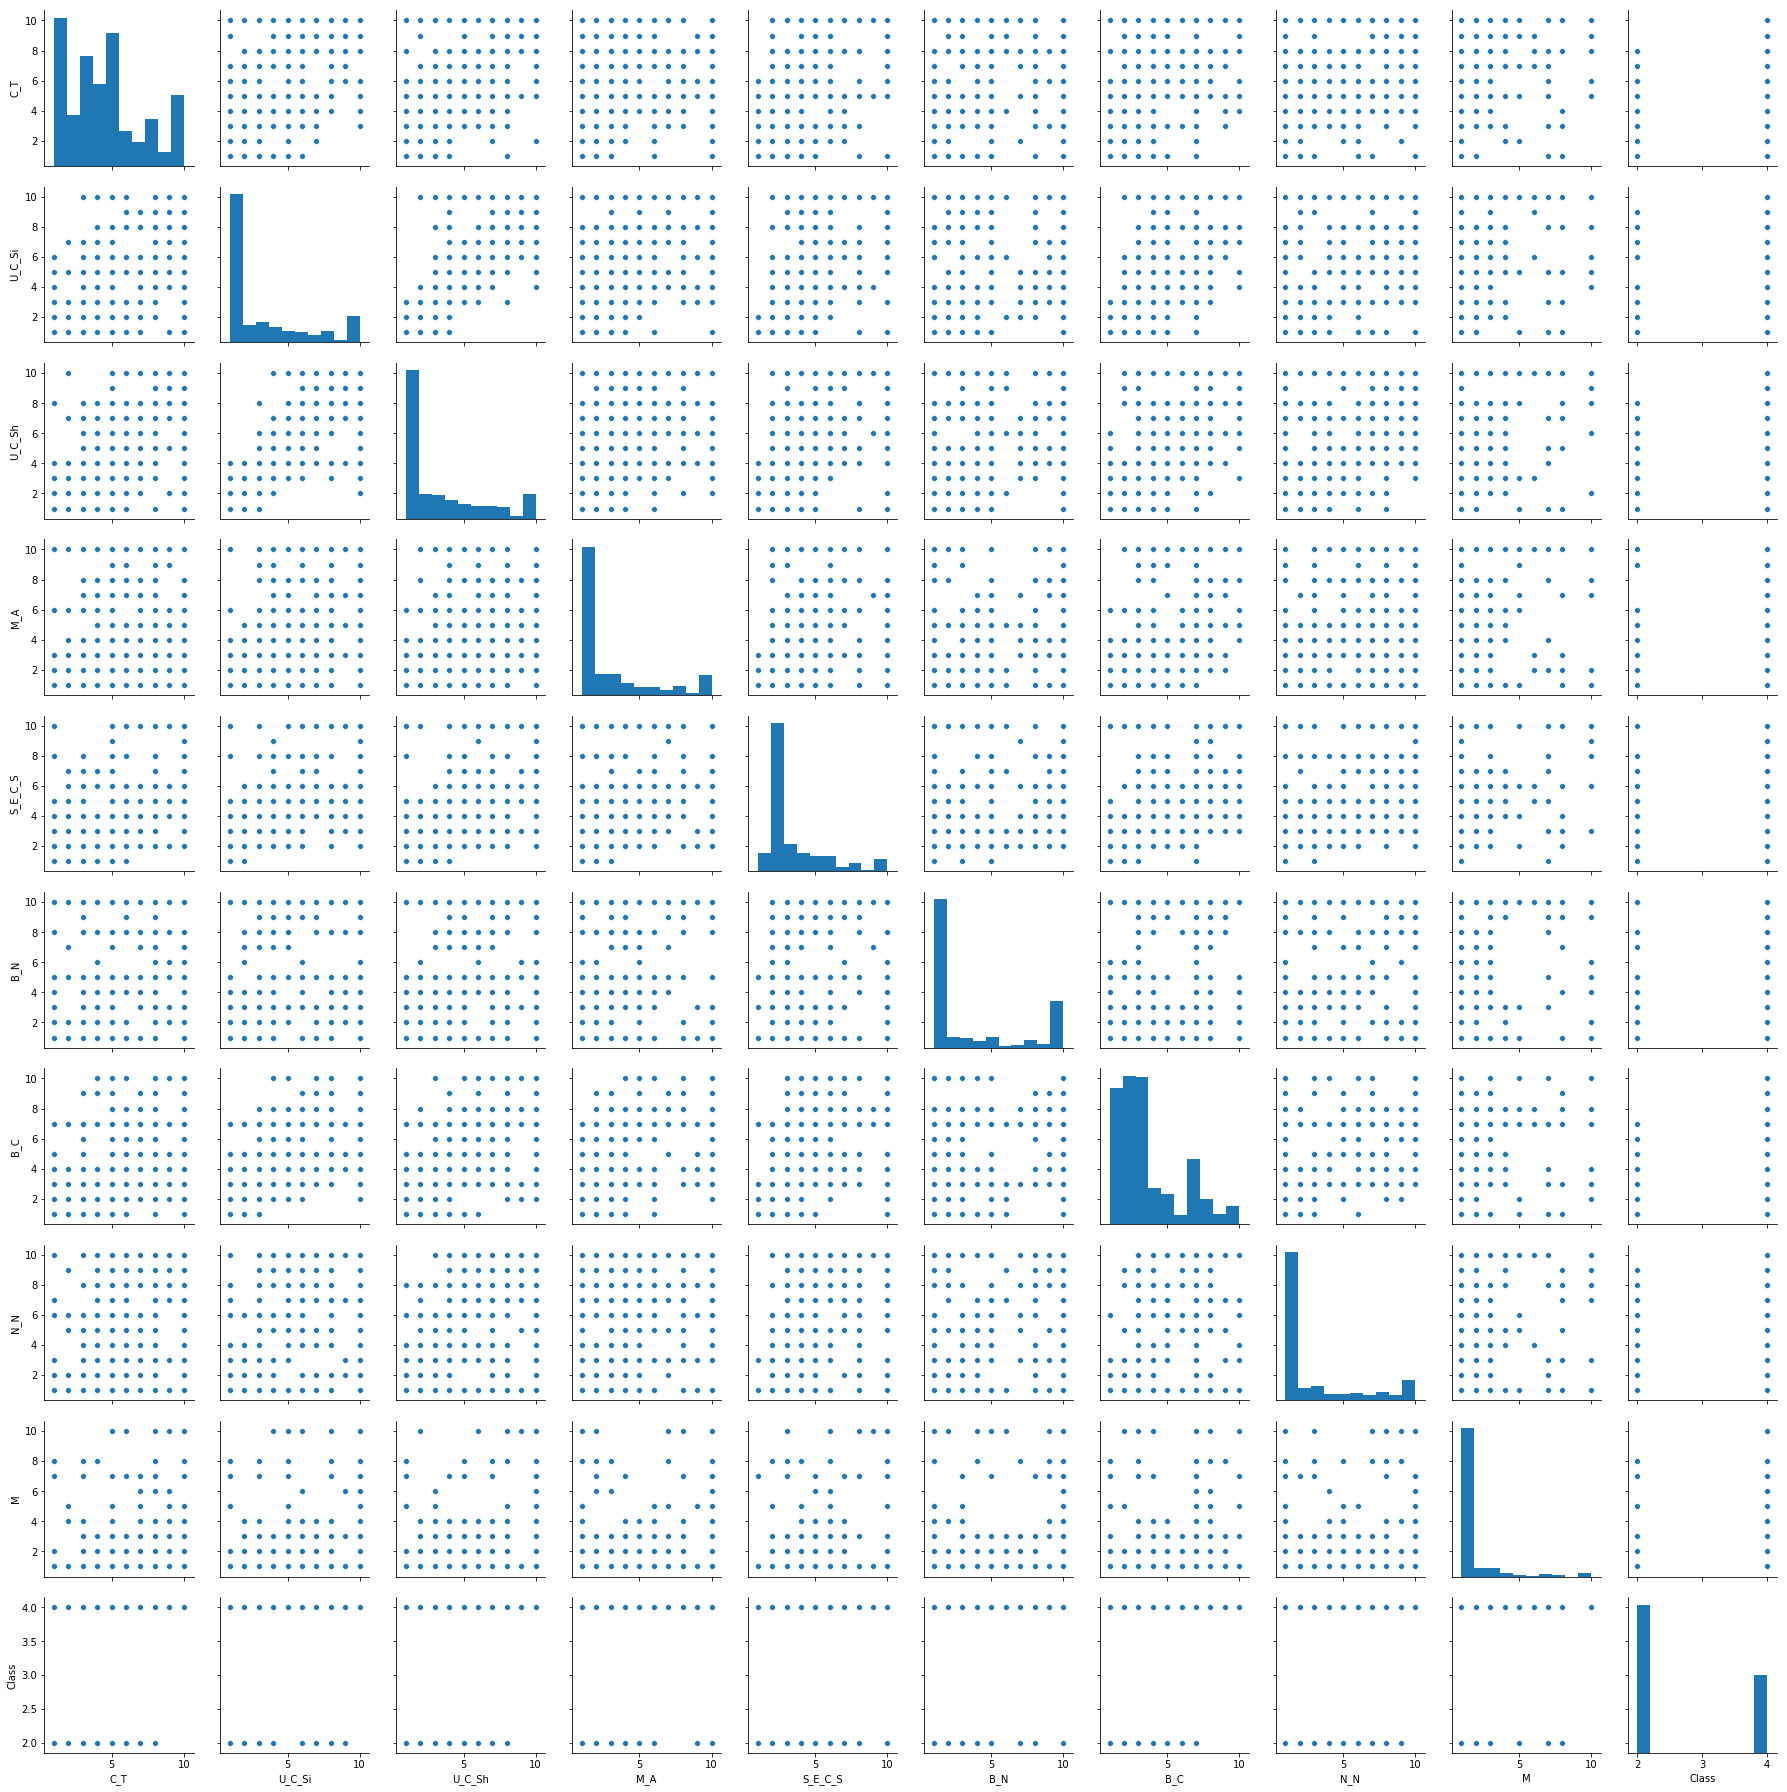

In [94]:
from seaborn import pairplot
pairplot(breast_cancer_data)

### 二、算法评估

### 1. 预测模型对比

In [95]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [96]:
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['DT'] = DecisionTreeClassifier()
models['KNN'] = KNeighborsClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [97]:
validation_size = 0.2
seed = 7
X = breast_cancer_data.iloc[:, :-1]
Y = breast_cancer_data.iloc[:, -1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [98]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [99]:
# 评估算法
results = []
for model in models.keys():
    result = cross_val_score(models[model], X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (model, result.mean(), result.std())
    print(msg)

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

LR: 0.959 (0.032)
LDA: 0.957 (0.030)
DT: 0.934 (0.038)
KNN: 0.970 (0.024)
NB: 0.959 (0.035)
SVM: 0.959 (0.033)


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/guofei/anaconda3/lib/python3.6/site-packages/

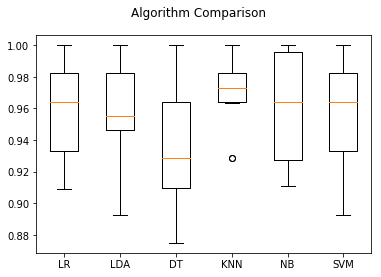

In [101]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

#### 2. 预测

In [102]:
#使用评估数据集评估算法
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9642857142857143
[[89  2]
 [ 3 46]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        91
           4       0.96      0.94      0.95        49

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



### 三、取出部分数据，进行semi-supervised

#### 1. 探索

In [145]:
data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.to_csv('breast-cancer-wisconsin_cleaned.csv', index=None)

In [146]:
breast_cancer_data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')

In [147]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
C_T        699 non-null int64
U_C_Si     699 non-null int64
U_C_Sh     699 non-null int64
M_A        699 non-null int64
S_E_C_S    699 non-null int64
B_N        699 non-null int64
B_C        699 non-null int64
N_N        699 non-null int64
M          699 non-null int64
Class      699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [148]:
breast_cancer_data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [149]:
Y = breast_cancer_data[['Class']]
X = breast_cancer_data.drop('Class', axis=1)

In [152]:
Y.shape

(699, 1)

In [237]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_labels(n_splits=1, test_size=0.6, random_seed=None):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_seed)
    return sss

In [238]:
sss = stratified_labels()
for label_index, unlabel_index in sss.split(X, Y):
    X_train=X.iloc[label_index]
    Y_train=Y.iloc[label_index]
    X_test=X.iloc[unlabel_index]
    Y_test=Y.iloc[unlabel_index]

In [231]:
import copy
Y_unlabel = copy.deepcopy(Y_test)

In [239]:
Y_unlabel['Class'] = -1

In [240]:
X_new = pd.concat([X_train, X_test])
Y_new = pd.concat([Y_train, Y_unlabel])

In [242]:
from sklearn.semi_supervised import LabelPropagation
lp = LabelPropagation(gamma=3, n_neighbors=4, max_iter=1000)
lp.fit(X_new, Y_new)

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelPropagation(alpha=None, gamma=3, kernel='rbf', max_iter=1000,
         n_jobs=None, n_neighbors=4, tol=0.001)

In [243]:
Y_predict_train = lp.predict(X_train)
Y_predict_test = lp.predict(X_test)
print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))

The accuracy in train set: 1.0
The accuracy in test set: 0.95


In [249]:
# 尝试数据打乱,会有一定的变化
for label_index, unlabel_index in sss.split(X, Y):
    X_train = X.iloc[label_index]
    Y_train = Y.iloc[label_index]
    X_test = X.iloc[unlabel_index]
    Y_test = Y.iloc[unlabel_index]

    Y_unlabel = copy.deepcopy(Y_test)
    Y_unlabel['Class'] = -1

    X_new = pd.concat([X_train, X_test])
    Y_new = pd.concat([Y_train, Y_unlabel])
    # print(X_new.index)
    # print(Y_new.index)

    shuffle_index = np.random.permutation(X.index)
    X_new_shuffle = X_new.take(shuffle_index)
    Y_new_shuffle = Y_new.take(shuffle_index)
    # print(X_new_shuffle.index)
    # print(X_new_shuffle.index)

    lp = LabelPropagation(gamma=3, n_neighbors=4, max_iter=1000)
    lp.fit(X_new_shuffle, Y_new_shuffle.values.ravel())

    Y_predict_train = lp.predict(X_train)
    Y_predict_test = lp.predict(X_test)
    print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
    print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))

The accuracy in train set: 1.0
The accuracy in test set: 0.9642857142857143


#### 2. 样本随机和交叉验证的影响

略有波动，但整体差别不大

In [250]:
# 尝试多次cross_validate

def semi_shuffle_estimator(n_splits=10, test_size=0.6, seed=0, gamma=3.8, n_neighbors=4, max_iter=1000):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
    i = 0
    for label_index, unlabel_index in sss.split(X, Y):
        i += 1
        X_train = X.iloc[label_index]
        Y_train = Y.iloc[label_index]
        X_test = X.iloc[unlabel_index]
        Y_test = Y.iloc[unlabel_index]

        Y_unlabel = copy.deepcopy(Y_test)
        Y_unlabel['Class'] = -1

        X_new = pd.concat([X_train, X_test])
        Y_new = pd.concat([Y_train, Y_unlabel])


        shuffle_index = np.random.permutation(X.index)
        X_new_shuffle = X_new.take(shuffle_index)
        Y_new_shuffle = Y_new.take(shuffle_index)

        lp = LabelPropagation(gamma=gamma, n_neighbors=n_neighbors, max_iter=max_iter)
        lp.fit(X_new_shuffle, Y_new_shuffle.values.ravel())

        Y_predict_train = lp.predict(X_train)
        Y_predict_test = lp.predict(X_test)
        print("-------Cross_validation epoch {}--------".format(i))
        print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
        print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))

semi_shuffle_estimator()

-------Cross_validation epoch 1--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9619047619047619
-------Cross_validation epoch 2--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 3--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9452380952380952
-------Cross_validation epoch 4--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9547619047619048
-------Cross_validation epoch 5--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 8--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
T

#### 3. 数据标准化的影响

将数据进行标准化后，需对gamma进行调节，其整体效果与非标准化的结构类似

In [254]:
data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')
data.to_csv()

scaler = StandardScaler()

Y = data[['Class']]
X = data.drop('Class', axis=1)


X_std = scaler.fit_transform(X)
X_pd = pd.DataFrame(X_std, columns=X.columns)
X = X_pd

from sklearn.model_selection import StratifiedShuffleSplit

def semi_shuffle_estimator(n_splits=10, test_size=0.6, seed=0, gamma=1, n_neighbors=4, max_iter=1000):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
    i = 0
    for label_index, unlabel_index in sss.split(X, Y):
        i += 1
        X_train = X.iloc[label_index]
        Y_train = Y.iloc[label_index]
        X_test = X.iloc[unlabel_index]
        Y_test = Y.iloc[unlabel_index]

        Y_unlabel = copy.deepcopy(Y_test)
        Y_unlabel['Class'] = -1

        X_new = pd.concat([X_train, X_test])
        Y_new = pd.concat([Y_train, Y_unlabel])


        shuffle_index = np.random.permutation(X.index)
        X_new_shuffle = X_new.take(shuffle_index)
        Y_new_shuffle = Y_new.take(shuffle_index)

        lp = LabelPropagation(gamma=gamma, n_neighbors=n_neighbors, max_iter=max_iter)
        lp.fit(X_new_shuffle, Y_new_shuffle.values.ravel())

        Y_predict_train = lp.predict(X_train)
        Y_predict_test = lp.predict(X_test)
        print("-------Cross_validation epoch {}--------".format(i))
        print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
        print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))

semi_shuffle_estimator()

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


-------Cross_validation epoch 1--------
The accuracy in train set: 0.982078853046595
The accuracy in test set: 0.9642857142857143
-------Cross_validation epoch 2--------
The accuracy in train set: 0.985663082437276
The accuracy in test set: 0.969047619047619
-------Cross_validation epoch 3--------
The accuracy in train set: 0.978494623655914
The accuracy in test set: 0.9642857142857143
-------Cross_validation epoch 4--------
The accuracy in train set: 0.989247311827957
The accuracy in test set: 0.9642857142857143
-------Cross_validation epoch 5--------
The accuracy in train set: 0.989247311827957
The accuracy in test set: 0.95
-------Cross_validation epoch 6--------
The accuracy in train set: 0.982078853046595
The accuracy in test set: 0.9571428571428572
-------Cross_validation epoch 7--------
The accuracy in train set: 0.989247311827957
The accuracy in test set: 0.9642857142857143
-------Cross_validation epoch 8--------
The accuracy in train set: 0.985663082437276
The accuracy in test

#### 4. gamma值的影响

gamma值是将数据在高斯核空间进行距离计算时的参数，当数据较大时需要较大的gamma值，否则容易发散

In [255]:
import matplotlib.pyplot as plt

-------Cross_validation epoch 1--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9642857142857143


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


-------Cross_validation epoch 2--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9547619047619048
-------Cross_validation epoch 3--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9452380952380952


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


-------Cross_validation epoch 4--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 5--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 8--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 10--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
For gamma 1, the mean accuracy in train set is 1.0
For gamma 1, the mean accuracy in test set is 0.9519047619047617
-------Cross_validation epoch 1--------
The accuracy in train set: 1.0
The accuracy i

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


-------Cross_validation epoch 2--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
-------Cross_validation epoch 3--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 4--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 5--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 8--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
-------Cross_validation epoch 10--------
The accuracy in train set: 1.0

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


-------Cross_validation epoch 2--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
-------Cross_validation epoch 3--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 4--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 5--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
-------Cross_validation epoch 8--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
-------Cross_validation epoch 10--------
The accuracy in train set: 1.0
The accuracy 

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 2--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
-------Cross_validation epoch 3--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 4--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9547619047619048
-------Cross_validation epoch 5--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
-------Cross_validation epoch 8--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9523809523809523
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95
-------Cross_validation epoch 10--------
The accuracy in train set: 1.0
The accuracy 

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 1--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 2--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 3--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 4--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 5--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
-------Cross_validation epoch 6--------
The accuracy in train set: 1.0
The accuracy in test set: 0.9428571428571428
-------Cross_validation epoch 7--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


-------Cross_validation epoch 8--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
-------Cross_validation epoch 9--------
The accuracy in train set: 1.0
The accuracy in test set: 0.95


/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


-------Cross_validation epoch 10--------
The accuracy in train set: 0.6559139784946236
The accuracy in test set: 0.6547619047619048
For gamma 9, the mean accuracy in train set is 0.7591397849462366
For gamma 9, the mean accuracy in test set is 0.7426190476190476


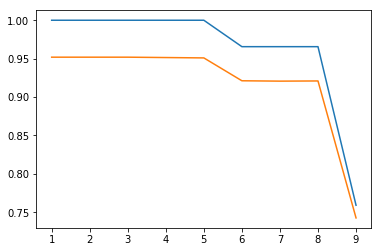

In [256]:

data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')
data.to_csv()
#
# scaler = StandardScaler()

Y = data[['Class']]
X = data.drop('Class', axis=1)


# X_std = scaler.fit_transform(X)
# X_pd = pd.DataFrame(X_std, columns=X.columns)
# X = X_pd


from sklearn.model_selection import StratifiedShuffleSplit

gamma_list = []
train_socres_list = []
test_scores_list = []
def semi_shuffle_estimator(n_splits=10, test_size=0.6, seed=0, gamma=10, n_neighbors=4, max_iter=1000):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
    i = 0
    gamma_list.append(gamma)
    train_scores = []
    test_scores =[]
    for label_index, unlabel_index in sss.split(X, Y):
        i += 1
        X_train = X.iloc[label_index]
        Y_train = Y.iloc[label_index]
        X_test = X.iloc[unlabel_index]
        Y_test = Y.iloc[unlabel_index]

        Y_unlabel = copy.deepcopy(Y_test)
        Y_unlabel['Class'] = -1

        X_new = pd.concat([X_train, X_test])
        Y_new = pd.concat([Y_train, Y_unlabel])


        shuffle_index = np.random.permutation(X.index)
        X_new_shuffle = X_new.take(shuffle_index)
        Y_new_shuffle = Y_new.take(shuffle_index)

        lp = LabelPropagation(gamma=gamma, n_neighbors=n_neighbors, max_iter=max_iter)
        lp.fit(X_new_shuffle, Y_new_shuffle.values.ravel())

        Y_predict_train = lp.predict(X_train)
        Y_predict_test = lp.predict(X_test)
        train_scores.append(accuracy_score(Y_train, Y_predict_train))
        test_scores.append(accuracy_score(Y_test, Y_predict_test))
        print("-------Cross_validation epoch {}--------".format(i))
        print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
        print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))
    mean_train_score = np.array(train_scores).mean()
    mean_test_score = np.array(test_scores).mean()
    print("For gamma {}, the mean accuracy in train set is {}".format(gamma, mean_train_score))
    print("For gamma {}, the mean accuracy in test set is {}".format(gamma, mean_test_score))
    train_socres_list.append(mean_train_score)
    test_scores_list.append(mean_test_score)

for gamma in np.arange(1, 10):
    semi_shuffle_estimator(gamma=gamma)
plt.plot(gamma_list, train_socres_list)
plt.plot(gamma_list, test_scores_list)
plt.show()

For test size 0.1, the mean accuracy in train set is 1.0
For test size 0.1, the mean accuracy in test set is 0.95
For test size 0.14421052631578948, the mean accuracy in train set is 1.0
For test size 0.14421052631578948, the mean accuracy in test set is 0.9524752475247524
For test size 0.18842105263157893, the mean accuracy in train set is 1.0
For test size 0.18842105263157893, the mean accuracy in test set is 0.956818181818182
For test size 0.2326315789473684, the mean accuracy in train set is 1.0
For test size 0.2326315789473684, the mean accuracy in test set is 0.952760736196319
For test size 0.2768421052631579, the mean accuracy in train set is 1.0
For test size 0.2768421052631579, the mean accuracy in test set is 0.9561855670103092
For test size 0.32105263157894737, the mean accuracy in train set is 1.0
For test size 0.32105263157894737, the mean accuracy in test set is 0.9560000000000001
For test size 0.36526315789473685, the mean accuracy in train set is 1.0
For test size 0.365

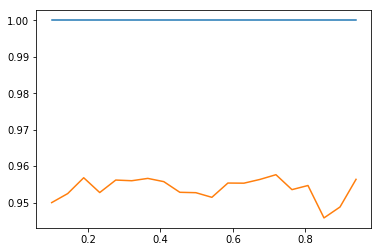

In [257]:
#### 5. Test_size值的影响

data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')
data.to_csv()
#
# scaler = StandardScaler()

Y = data[['Class']]
X = data.drop('Class', axis=1)


# X_std = scaler.fit_transform(X)
# X_pd = pd.DataFrame(X_std, columns=X.columns)
# X = X_pd


from sklearn.model_selection import StratifiedShuffleSplit

testsize_list = []
train_socres_list = []
test_scores_list = []

def semi_shuffle_estimator(n_splits=10, test_size=0.6, seed=0, gamma=4, n_neighbors=6, max_iter=1000):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
    i = 0
    testsize_list.append(test_size)
    train_scores = []
    test_scores =[]
    for label_index, unlabel_index in sss.split(X, Y):
        i += 1
        X_train = X.iloc[label_index]
        Y_train = Y.iloc[label_index]
        X_test = X.iloc[unlabel_index]
        Y_test = Y.iloc[unlabel_index]

        Y_unlabel = copy.deepcopy(Y_test)
        Y_unlabel['Class'] = -1

        X_new = pd.concat([X_train, X_test])
        Y_new = pd.concat([Y_train, Y_unlabel])


        shuffle_index = np.random.permutation(X.index)
        X_new_shuffle = X_new.take(shuffle_index)
        Y_new_shuffle = Y_new.take(shuffle_index)

        lp = LabelPropagation(gamma=gamma, n_neighbors=n_neighbors, max_iter=max_iter)
        lp.fit(X_new_shuffle, Y_new_shuffle.values.ravel())

        Y_predict_train = lp.predict(X_train)
        Y_predict_test = lp.predict(X_test)
        train_scores.append(accuracy_score(Y_train, Y_predict_train))
        test_scores.append(accuracy_score(Y_test, Y_predict_test))
        # print("-------Cross_validation epoch {}--------".format(i))
        # print("The accuracy in train set:", accuracy_score(Y_train, Y_predict_train))
        # print("The accuracy in test set:", accuracy_score(Y_test, Y_predict_test))
    mean_train_score = np.array(train_scores).mean()
    mean_test_score = np.array(test_scores).mean()
    print("For test size {}, the mean accuracy in train set is {}".format(test_size, mean_train_score))
    print("For test size {}, the mean accuracy in test set is {}".format(test_size, mean_test_score))
    train_socres_list.append(mean_train_score)
    test_scores_list.append(mean_test_score)

for ratio in np.linspace(0.1, 0.94, 20):
    semi_shuffle_estimator(test_size=ratio)
plt.plot(testsize_list, train_socres_list)
plt.plot(testsize_list, test_scores_list)
plt.show()

#### 三、聚类

#### 1. PCA降维

[0.68900383 0.07337931]


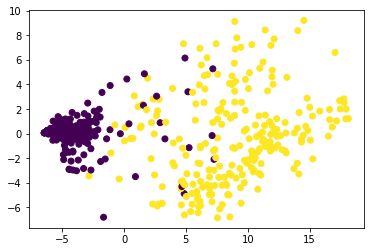

In [258]:
from sklearn.decomposition import PCA
data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')

Y = data[['Class']]
X = data.drop('Class', axis=1)

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

plt.scatter(X_new[:, 0], X_new[:, 1], c=Y['Class'])
plt.show()

##### 2. K-means

In [270]:
data = pd.read_csv('breast-cancer-wisconsin_cleaned.csv')

Y = data[['Class']]
X = data.drop('Class', axis=1)

from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=2, random_state=42)
y_predict = estimator.fit_predict(X)
print(y_predict)
print(sum(np.array(y_predict)==0))
print(sum(np.array(y_predict)==1))
print(Y['Class'].value_counts())

Y_temp = copy.deepcopy(Y)
Y_temp.loc[Y['Class']==2, 'Class'] = 0
Y_temp.loc[Y['Class']==4, 'Class'] = 1
print(accuracy_score(Y_temp['Class'], y_predict))

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 